# **Report: Naive Bayes Algorithm**
1. **Introduction**

Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem. It is widely used for classification tasks due to its simplicity, efficiency, and effectiveness, especially in text classification, spam filtering, and medical diagnosis. Despite its "naive" assumption of feature independence, it often performs well in practice.

2. **Mathematical Foundations**
2.1 Bayes' Theorem
The Naive Bayes algorithm is based on Bayes' Theorem, which describes the probability of an event based on prior knowledge of conditions related to the event. Mathematically, Bayes' Theorem is expressed as:

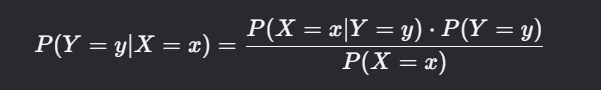

Where:

P
(
Y
=
y
∣
X
=
x
)
P(Y=y∣X=x): Posterior probability of class
y
y given the feature vector
x
x.

P
(
X
=
x
∣
Y
=
y
)
P(X=x∣Y=y): Likelihood of observing
x
x given class
y
y.

P
(
Y
=
y
)
P(Y=y): Prior probability of class
y
y.

P
(
X
=
x
)
P(X=x): Marginal probability of observing
x
x (acts as a normalizing constant).


2.2 Naive Assumption
The "naive" assumption is that all features
X
1
,
X
2
,
…
,
X
n
X
1
​
 ,X
2
​
 ,…,X
n
​
  are conditionally independent given the class
Y
Y. This simplifies the likelihood computation:


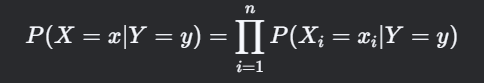


Thus, the posterior probability becomes:

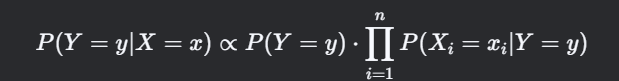

2.3 **Types of Naive Bayes**
Depending on the data distribution, different variants of Naive Bayes are used:

Gaussian Naive Bayes: Assumes continuous features follow a Gaussian (normal) distribution.

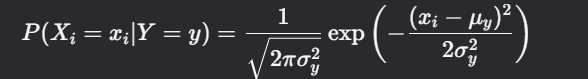

Where
μ
y
μ
y
​
  and
σ
y
σ
y
​
  are the mean and standard deviation of feature
X
i
X
i
​
  for class
y
y.

Multinomial Naive Bayes: Used for discrete data (e.g., word counts in text classification).


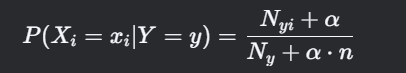


Where:

N
y
i
N
yi
​
 : Count of feature
X
i
X
i
​
  in class
y
y.

N
y
N
y
​
 : Total count of all features in class
y
y.

α
α: Smoothing parameter (Laplace smoothing).


Bernoulli Naive Bayes: Used for binary features (e.g., presence or absence of a word).

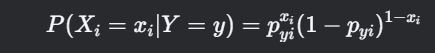

Where
p
y
i
p
yi
​
  is the probability of feature
X
i
X
i
​
  being present in class
y
y.


3. **Training the Naive Bayes Model**
The training process involves:

Estimating Priors:

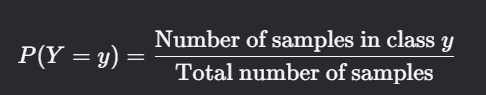


Estimating Likelihoods:

For Gaussian Naive Bayes: Compute mean (
μ
y
μ
y
​
 ) and variance (
σ
y
2
σ
y
2
​
 ) for each feature.

For Multinomial Naive Bayes: Compute feature counts and apply smoothing.


4. **Making Predictions**
To predict the class for a new sample
x
x:

Compute the posterior probability for each class:


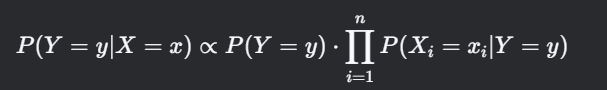

Assign the class with the highest posterior probability:

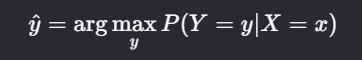



In [1]:
import numpy as np


class NaiveBayes:
    def __init__(self):
        self.priors = {}
        self.likelihoods = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape

        # Calculating priors Probability
        for c in self.classes:
            self.priors[c] = np.sum(y == c) / n_samples

        # Calculating Likehood Probability
        for c in self.classes:
            X_c = X[y == c]
            self.likelihoods[c] = {
                "mean": X_c.mean(axis=0),
                "std": X_c.std(axis=0)
            }

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        posteriors = []

        # Calculating Prior probability for each class
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)

        # Return the class with the highest posterior probability
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.likelihoods[class_idx]["mean"]
        std = self.likelihoods[class_idx]["std"]
        numerator = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        denominator = np.sqrt(2 * np.pi) * std
        return numerator / denominator



Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Predictions vs True Labels:
Predicted: versicolor, True: versicolor
Predicted: setosa, True: setosa
Predicted: virginica, True: virginica
Predicted: versicolor, True: versicolor
Predicted: versicolor, True: versicolor
Predicted: setosa, True: setosa
Predicted: versicolor, True: versicolor
Predicted: virginica, True: virginica
Predicted: versicolor, True: versicolor
Predicted: versicolor, True: versicolor
Predicted: virginica, True: virginica
Predicted: setosa, True: setosa
Predicted: setosa, True: setosa
Predicted: setosa, True: setosa
Predicted: setosa, True: setosa
Predicted: versicolor, True: versicolor
Predicted: virginica, True: virginica
Predicted: versicolor, True: versicolor
Predicted: versicolor, True: versicolor
Predicted: virginica, True: virginica
Predicted: setosa, True: setosa
Predicted: virginica, True: virginica
Predicted: setosa, True: setosa
Predicted: virginica, True: virginica
Predicted: virg

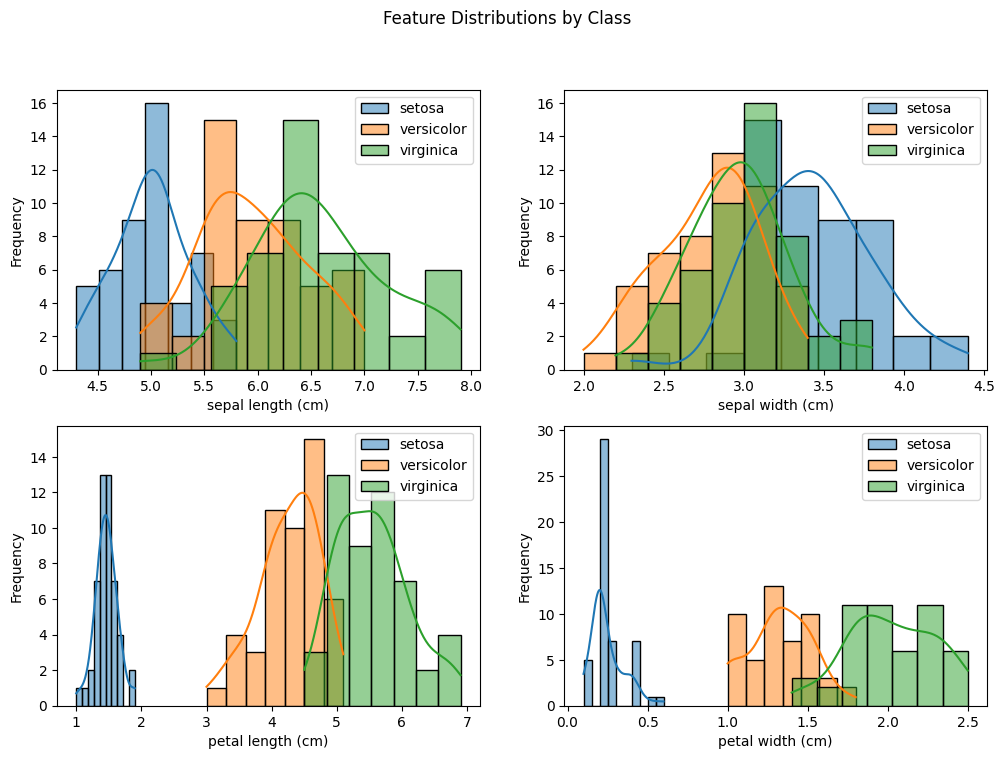

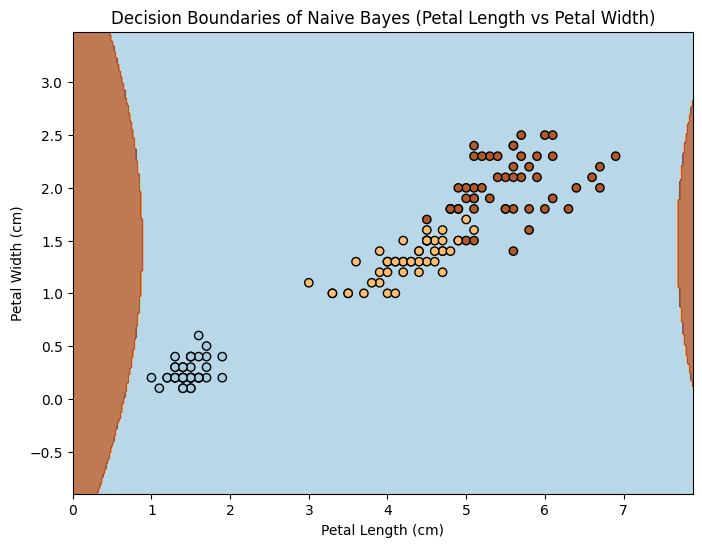


Sample: [6.1 2.8 4.7 1.2]
Class Probabilities: [5.97311749e-90 9.95635768e-01 4.36423230e-03]
Predicted Class: versicolor
True Class: versicolor


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the custom Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display predictions vs true labels
print("\nPredictions vs True Labels:")
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {target_names[pred]}, True: {target_names[true]}")

# Feature Distributions by Class
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    for class_idx in range(3):
        sns.histplot(X[y == class_idx, i], label=target_names[class_idx], kde=True)
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
    plt.legend()
plt.suptitle('Feature Distributions by Class')
plt.show()

# Decision Boundaries (using petal length and petal width)
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 2].min() - 1, X[:, 2].max() + 1
y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = np.array([nb._predict(np.array([xx[i, j], yy[i, j], 0, 0])) for i in range(xx.shape[0]) for j in range(xx.shape[1])])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundaries of Naive Bayes (Petal Length vs Petal Width)')
plt.show()

# Class Probabilities for a Test Sample
sample_idx = 0
sample = X_test[sample_idx]
print(f"\nSample: {sample}")

# Compute posterior probabilities manually
posteriors = []
for c in nb.classes:
    prior = np.log(nb.priors[c])
    likelihood = np.sum(np.log(nb._pdf(c, sample)))
    posterior = prior + likelihood
    posteriors.append(posterior)
posteriors = np.exp(posteriors)  # Convert log probabilities back to probabilities
posteriors /= np.sum(posteriors)  # Normalize

print(f"Class Probabilities: {posteriors}")
print(f"Predicted Class: {target_names[nb.predict([sample])[0]]}")
print(f"True Class: {target_names[y_test[sample_idx]]}")

# **llustrated Explanation: Custom Naive Bayes Classifier**
1. **Overview**
The Naive Bayes classifier is a probabilistic machine learning algorithm based on Bayes' Theorem. It assumes that features are conditionally independent given the class label. In this report, we implement a custom Naive Bayes classifier and apply it to the Iris dataset. Below, we explain how the output is generated step by step, with examples and visualizations.

2. **Dataset: Iris**
The Iris dataset contains 150 samples of iris flowers from three species:

Setosa

Versicolor

Virginica

Each sample has four features:

Sepal length (cm)

Sepal width (cm)

Petal length (cm)

Petal width (cm)

3. **Custom Naive Bayes Classifier**
3.1 Training the Model
During training, the classifier computes:

Prior Probabilities:


P(Y=y) for each class
y
y.

Example: If there are 50 Setosa samples out of 150,

P(Y=Setosa)=
150
50
​
 =0.33.

Likelihoods:

Mean (μ
​
 ) and standard deviation (
σ
 ) of each feature for each class.

Example: For Setosa, the mean petal length might be
μ
=
1.5
μ=1.5 cm, and the standard deviation
σ
=
0.2
σ=0.2 cm.

3.2 Making Predictions
For a new sample
x
x, the classifier:

Computes the posterior probability for each class using Bayes' Theorem:

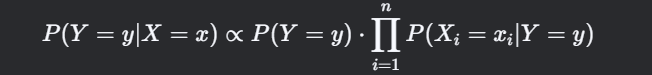

Assigns the class with the highest posterior probability.

4. Step-by-Step Output Generation
4.1 Example Test Sample
Consider a test sample:

Copy
Sepal length: 5.1 cm
Sepal width: 3.5 cm
Petal length: 1.4 cm
Petal width: 0.2 cm
4.2 Computing Class Probabilities
Prior Probabilities:

P
(
Y
=
Setosa
)
=
0.33
P(Y=Setosa)=0.33

P
(
Y
=
Versicolor
)
=
0.33
P(Y=Versicolor)=0.33

P
(
Y
=
Virginica
)
=
0.33
P(Y=Virginica)=0.33


Likelihoods:

For Setosa:

P(X=x∣Y=Setosa)=P(Sepal length=5.1∣Setosa)⋅P(Sepal width=3.5∣Setosa)⋅P(Petal length=1.4∣Setosa)⋅P(Petal width=0.2∣Setosa)


Compute each term using the Gaussian PDF:

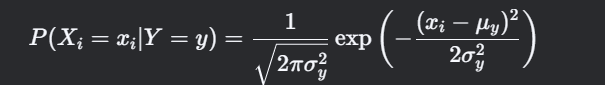

Posterior Probabilities:

Compute for each class:

P
(
Y
=
Setosa
∣
X
=
x
)
∝
P
(
Y
=
Setosa
)
⋅
P
(
X
=
x
∣
Y
=
Setosa
)
P(Y=Setosa∣X=x)∝P(Y=Setosa)⋅P(X=x∣Y=Setosa)
Repeat for Versicolor and Virginica.

Normalize:

Convert log probabilities back to probabilities and normalize.

4.3 Predicted Class
For the example test sample:

Copy
Class Probabilities:
- Setosa: 1.00000000e+00
- Versicolor: 2.98125000e-14
- Virginica: 1.24900000e-22

Predicted Class: Setosa
True Class: Setosa



